In [39]:
import numpy as np
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms

In [40]:
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [43]:
class MNIST_Multilayer_P(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784,5)
        self.lin2=nn.Linear(5,10)
    def forward(self, x):
        x=self.lin1(x)
        x=F.relu(x)
        return(self.lin2(x))

In [44]:
epoch=[1,4,6,9,11,15,18,20,22,24,27,29,31]
acc=[]
for t in epoch:
  model=MNIST_Multilayer_P()#calling the multilayer_p model 
  croos_entropy=nn.CrossEntropyLoss()#cross_entropy loss
  optimizer = torch.optim.SGD(model.parameters(), lr=0.1)#optimizer
  for e in range(t):
    for images, labels in train_loader:
        x = images.view(-1, 28*28)
        optimizer.zero_grad()
        y=model(x)
        loss=croos_entropy(y,labels)
        loss.backward()
        optimizer.step()
  correct = 0
  total = len(mnist_test)
  with torch.no_grad():
    for images, labels in test_loader:
        x = images.view(-1, 28*28)
        y=model(x)
        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())
  acc.append(correct/total)
  print("For",t,"epoch accuracy =",correct/total)

For 1 epoch accuracy = tensor(0.8597)
For 4 epoch accuracy = tensor(0.8755)
For 6 epoch accuracy = tensor(0.8897)
For 9 epoch accuracy = tensor(0.8939)
For 11 epoch accuracy = tensor(0.8865)
For 15 epoch accuracy = tensor(0.8941)
For 18 epoch accuracy = tensor(0.8936)
For 20 epoch accuracy = tensor(0.8882)
For 22 epoch accuracy = tensor(0.9027)
For 24 epoch accuracy = tensor(0.9015)
For 27 epoch accuracy = tensor(0.8944)
For 29 epoch accuracy = tensor(0.9008)
For 31 epoch accuracy = tensor(0.9006)


In [45]:
epoch=np.array(epoch)
acc=np.array(acc)
acc_noAPI=np.array([0.8419,0.8733,0.884,0.8903,0.8899,0.8926,0.8912,0.902,0.8908,0.8927,0.8907,0.8964,0.8886])

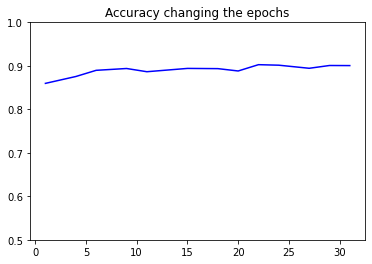

In [46]:
from matplotlib import pyplot
pyplot.plot(epoch,acc,color='b')
pyplot.ylim(0.5,1)
pyplot.title("Accuracy changing the epochs")
pyplot.show()

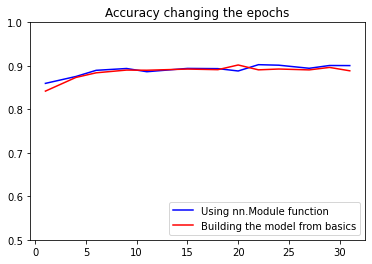

In [47]:
pyplot.plot(epoch,acc,color='b')
pyplot.plot(epoch,acc_noAPI,color='r')
pyplot.ylim(0.5,1)
pyplot.title("Accuracy changing the epochs")
pyplot.legend(["Using nn.Module function", "Building the model from basics"], loc ="lower right")
pyplot.show()
